In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

In [7]:
def imshow(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [8]:
def get_lane_mask(sample,lane_idx):
    points_lane = []
    h_max = np.max(data['h_samples'][sample])
    h_min = np.min(data['h_samples'][sample])
    x_idx = data['lanes'][sample][lane_idx]
    y_idx = data['h_samples'][sample]
    for x,y in zip(x_idx,y_idx):
        offset = (y-h_min)/20
    #     print(offset)
        if x>-100:
            points_lane.append([x-offset/2,y])
    x_idx_=x_idx.copy()
    y_idx_=y_idx.copy()
    x_idx_.reverse()
    y_idx_.reverse()
    for x,y in zip(x_idx_,y_idx_):
        offset = (y-h_min)/20
    #     print(offset)
        if x>-100:
            points_lane.append([x+offset/2,y])
    return points_lane

In [9]:
def create_lane_mask(img_raw,sample):
    colors = [[255,0,0],[0,255,0],[0,0,255],[0,255,255]]
    laneMask = np.zeros(img_raw.shape, dtype=np.uint8)
    for lane_idx in range(len(data.lanes[sample])):
        points_lane = get_lane_mask(sample,lane_idx)
        if len(points_lane)>0: 
            pts = np.array(points_lane, np.int32)
            pts = pts.reshape((-1,1,2))
            laneMask = cv2.fillPoly(laneMask,[pts],colors[lane_idx])
            colors = [[255,0,0],[0,255,0],[0,0,255],[0,255,255]]
            # create grey-scale label image
            label = np.zeros((720,1280),dtype = np.uint8)
            for i in range(len(colors)):
               label[np.where((laneMask == colors[i]).all(axis = 2))] = i+1
        else: continue
    return(img_raw, label)

In [10]:
data = pd.read_json('dataset/label_data.json', lines=True)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lanes      2858 non-null   object
 1   h_samples  2858 non-null   object
 2   raw_file   2858 non-null   object
dtypes: object(3)
memory usage: 67.1+ KB


,lanes,h_samples,raw_file
0,"[[-100, -100, -100, -100, 632, 625, 617, 609, ...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/6040/20.jpg
1,"[[-100, -100, -100, 658, 646, 635, 623, 612, 6...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/5320/20.jpg
2,"[[-100, 570, 554, 538, 522, 505, 489, 473, 456...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/23700/20.jpg
3,"[[-100, -100, -100, -100, 555, 542, 530, 517, ...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/51660/20.jpg
4,"[[-100, -100, -100, 522, 525, 528, 531, 534, 5...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/25680/20.jpg
...,...,...,...
2853,"[[-100, -100, -100, 595, 589, 583, 577, 571, 5...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/26520/20.jpg
2854,"[[-100, -100, 728, 683, 651, 624, 608, 592, 57...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/30960/20.jpg
2855,"[[417, 435, 453, 471, 477, 478, 480, 481, 482,...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/23220/20.jpg
2856,"[[-100, -100, -100, -100, 440, 451, 458, 458, ...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/35300/20.jpg


In [11]:
i = 0

In [20]:
for i in range(len(data.raw_file)):
    img_path = data.raw_file[i]
    img_path = os.path.join('dataset/',img_path)
    print('Reading from: ', img_path)
    file_name = img_path.split('/')
    file_name.pop(-1)
    file_path = os.path.join(*file_name)
    image_paths = glob.glob(file_path+'/*.jpg')
    i=0
    for path in image_paths:
        img_raw = cv2.imread(path)
        img_, mask = create_lane_mask(img_raw,i)
        save_path =  file_path + '/mask'+str(i)+'.tiff'
        print('Saving to: ', save_path)
        cv2.imwrite(save_path, mask)
        i+=1
    # fig = plt.figure(figsize=(15,20))
    # plt.subplot(211)
    # imshow(img_raw)
    # plt.subplot(212)
    # plt.imshow(mask)
    break
        
# i = i+1


Reading from:  dataset/clips/0313-1/6040/20.jpg
Saving to:  dataset/clips/0313-1/6040/mask0.tiff
Saving to:  dataset/clips/0313-1/6040/mask1.tiff
Saving to:  dataset/clips/0313-1/6040/mask2.tiff
Saving to:  dataset/clips/0313-1/6040/mask3.tiff
Saving to:  dataset/clips/0313-1/6040/mask4.tiff
Saving to:  dataset/clips/0313-1/6040/mask5.tiff
Saving to:  dataset/clips/0313-1/6040/mask6.tiff
Saving to:  dataset/clips/0313-1/6040/mask7.tiff
Saving to:  dataset/clips/0313-1/6040/mask8.tiff
Saving to:  dataset/clips/0313-1/6040/mask9.tiff
Saving to:  dataset/clips/0313-1/6040/mask10.tiff
Saving to:  dataset/clips/0313-1/6040/mask11.tiff
Saving to:  dataset/clips/0313-1/6040/mask12.tiff
Saving to:  dataset/clips/0313-1/6040/mask13.tiff
Saving to:  dataset/clips/0313-1/6040/mask14.tiff
Saving to:  dataset/clips/0313-1/6040/mask15.tiff
Saving to:  dataset/clips/0313-1/6040/mask16.tiff
Saving to:  dataset/clips/0313-1/6040/mask17.tiff
Saving to:  dataset/clips/0313-1/6040/mask18.tiff
Saving to:  

In [22]:
img = plt.imread('dataset/clips/0313-1/6040/mask20.tiff',0)
print(img.shape)
plt.imshow(img)
np.unique(img)


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/clips/0313-1/6040/mask20.tiff'

dtype('uint8')

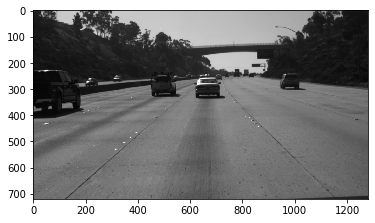

In [15]:
img = cv2.imread('dataset/clips/0313-1/4560/20.jpg',0)
imshow(img)
img.dtype

(720, 1280)

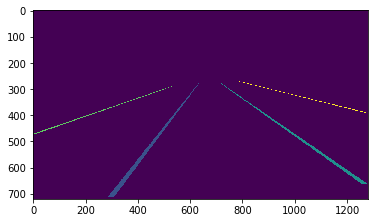

In [7]:
mask = cv2.imread('dataset/masks/0313-1/6040/20.tiff', cv2.IMREAD_GRAYSCALE)
plt.imshow(mask)
mask.shape

In [ ]:
cv2.imshow('mask',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()